TASK

Data table
                 A      B      C 
click           14      8      12
no-click        986     992    988

Hypothesis 0
                 A      B      C 
click           11.33   11.33. 11.33
no-click        988.67  988.67 988.67

Pearsons residuals
                 A      B      C
click            0.792  -0.99  0.198
no-click         -0.085 0.106  -0.021

chi2 (observed) = 1.666
p-Value = 0.4785


AttributeError: 'FancyBboxPatch' object has no property 'facecolour'

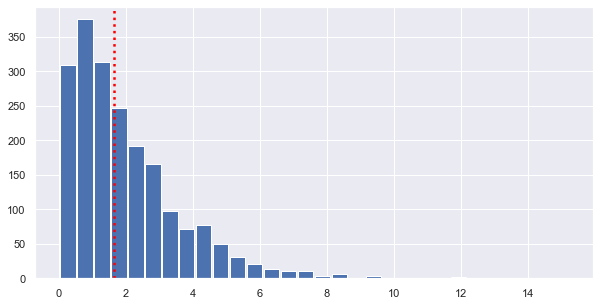

In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('/Users/ivankudravcev/Studying/Data/clicks.csv', sep=';')

clicks = [[14, 8, 12],
          [986, 992, 988]]

box = [1]*34
box.extend([0]*2966)
random.shuffle(box)

def chi2(observed, expexted):
    pearson_residuals = []
    for row, exp in zip(observed, expexted):
        pearson_residuals.append([(obs-exp)**2/exp for obs in row])
    return np.sum(pearson_residuals).round(3)


expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks
expected = [34/3, 1000-34/3]
chi2observed = chi2(clicks, expected)
print(f'chi2 (observed) = {chi2observed:.3f}')

def perm_func(box):
    sample_clicks = [np.sum(random.sample(box, 1000)),
                  np.sum(random.sample(box, 1000)),
                  np.sum(random.sample(box, 1000))]
    sample_noclicks = [1000-n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_func(box) for _ in range(2000)]
p_val = np.mean([chi2 > chi2observed for chi2 in perm_chi2])
print(f'p-Value = {p_val:.4f}')

fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(perm_chi2, bins=30, rwidth=0.9)
ax.axvline(chi2observed, ymin=0, ymax=300, color='red', ls=':', lw=2.5)
ax.text(chi2observed+0.4, 250, f'Observed\nchi^2 = {chi2observed}', bbox={'facecolour':'white'})
plt.xlabel('Chi^2 value')
plt.ylabel('Frequency')
plt.title('Permutation chi^2 histplot')
plt.show()

Расчитать хи2 при помощи stats

In [17]:
import numpy as np
from scipy import stats

clicks = [[14, 8, 12],
          [986, 992, 988]]
chi2, p_value, df, _ = stats.chi2_contingency(clicks)
p_value /= 2
print(f'chi2 = {chi2:.3f}')
print(f'p-Value = {p_value*2:.4f}')

chi2 = 1.666
p-Value = 0.4348
